# Multivariable Logistic Regression

In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
np.random.seed(42)
X = 2 * np.random.rand(100, 3)  # 100 random samples with 3 features
y = (X[:, 0] + X[:, 1] - X[:, 2] > 1.5).astype(int)  # Binary target

In [20]:
# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance


In [21]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
# Implement logistic regression
def logistic_regression(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n)  # Random initialization of theta
    for iteration in range(n_iterations):
        z = np.dot(X, theta)
        predictions = sigmoid(z)
        errors = predictions - y
        gradients = 1/m * np.dot(X.T, errors)
        theta = theta - learning_rate * gradients
    return theta

In [23]:
# Run logistic regression
theta_log = logistic_regression(X_b, y)

# Print the parameters
print("Intercept:", theta_log[0])
print("Coefficients:", theta_log[1:])

Intercept: -0.9138563524350272
Coefficients: [ 0.16828609  1.32450316 -1.12953471]


In [24]:
# Predict function
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return (sigmoid(np.dot(X_b, theta)) >= 0.5).astype(int)

In [25]:
# Predict on the training data
y_pred = predict(X, theta_log)


In [26]:
# Evaluation
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)


Accuracy: 0.79


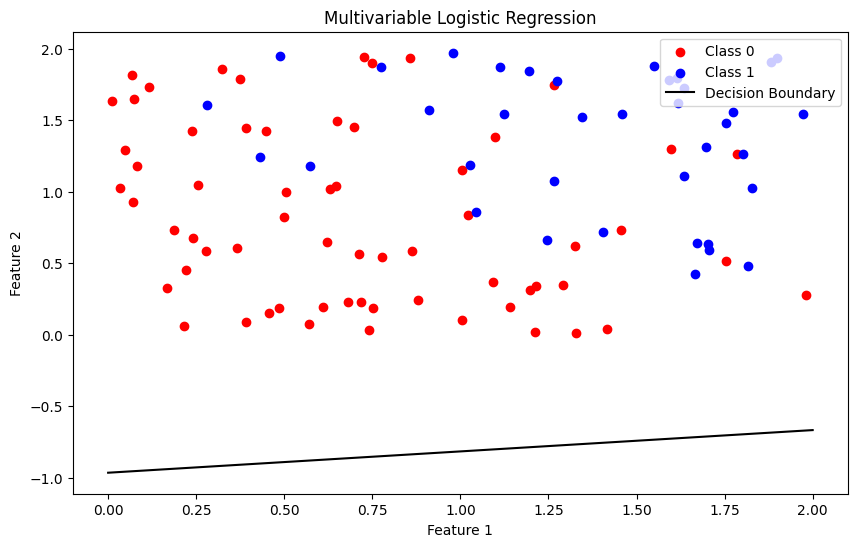

In [27]:
# Plot the data and the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

x1 = np.linspace(0, 2, 100)
x2 = (1.5 - theta_log[0] - theta_log[1]*x1 - theta_log[2]*1.0) / theta_log[3]
plt.plot(x1, x2, 'k-', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Multivariable Logistic Regression')
plt.show()